Data Science Project-II

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


##Steps
1) Create ML Model
2) Save the Model
3) Create a ML Model web app using Streamlit
4) Push the ML model and related files to github repo
5) Use Streamlit cloud to deploy the app from the github repo.


Requirements:
a) Jupyter
b)Dataset
c)Dependencies- pandas,numpy,pickle,skicit-learn
d)vs code
e)Github account
f) Streamlit cloud account


In [36]:
df=pd.read_csv(r'D:\DATA SCIENCE WITH PYTHON\Ds Project-II\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
df.shape

(1338, 7)

In [38]:
#Data Preprocessing
#1) Handelling null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [39]:
#2) Handell duplicates
df.duplicated().sum()

1

In [40]:
df.drop_duplicates(inplace=True)

In [41]:
df.duplicated().sum()


0

In [42]:
#3) Check data types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [43]:
#4)inconsistent data
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [44]:
#Correlation
#Seperate Num and Categorical features
num_cols=df.dtypes[df.dtypes!='object'].index
cat_cols=df.dtypes[df.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Index(['sex', 'smoker', 'region'], dtype='object')


In [45]:
corr=df[num_cols].corr()
corr

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


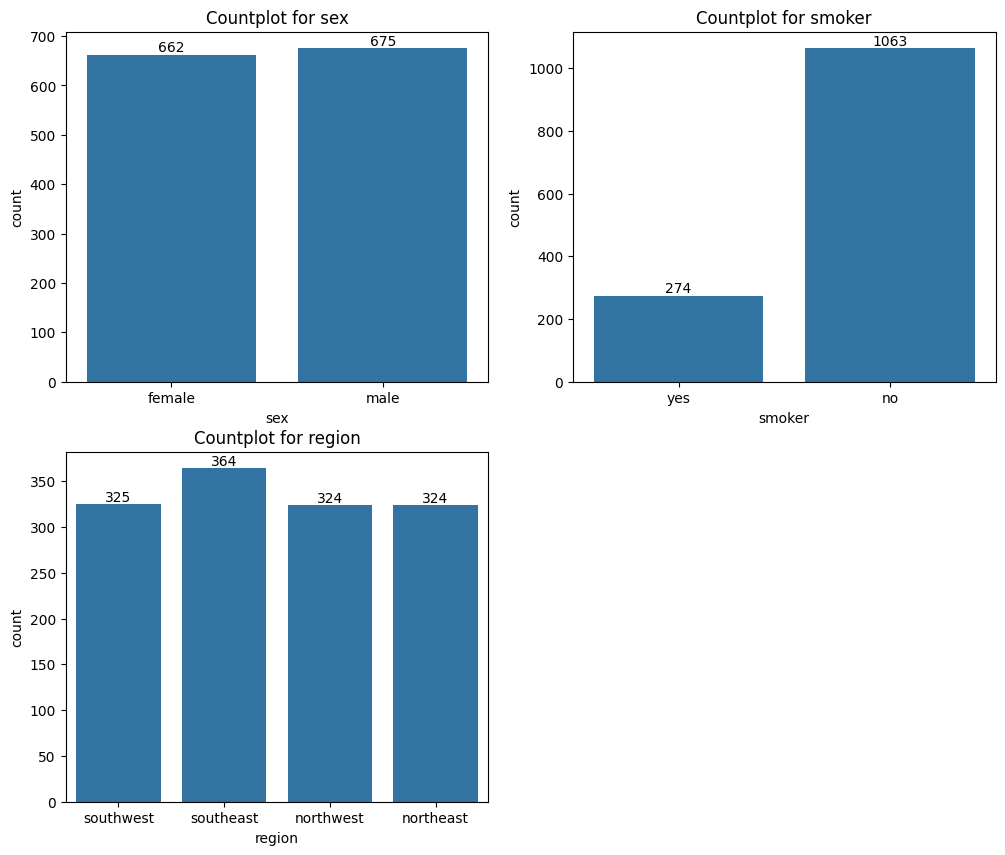

In [46]:
#EDA
# Univariate Analysis
plt.figure(figsize=(12,10))
for i in range(len(cat_cols)):
    plt.subplot(2,2,i+1)
    ax= sns.countplot(x=df[cat_cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cat_cols[i]}')
plt.show()

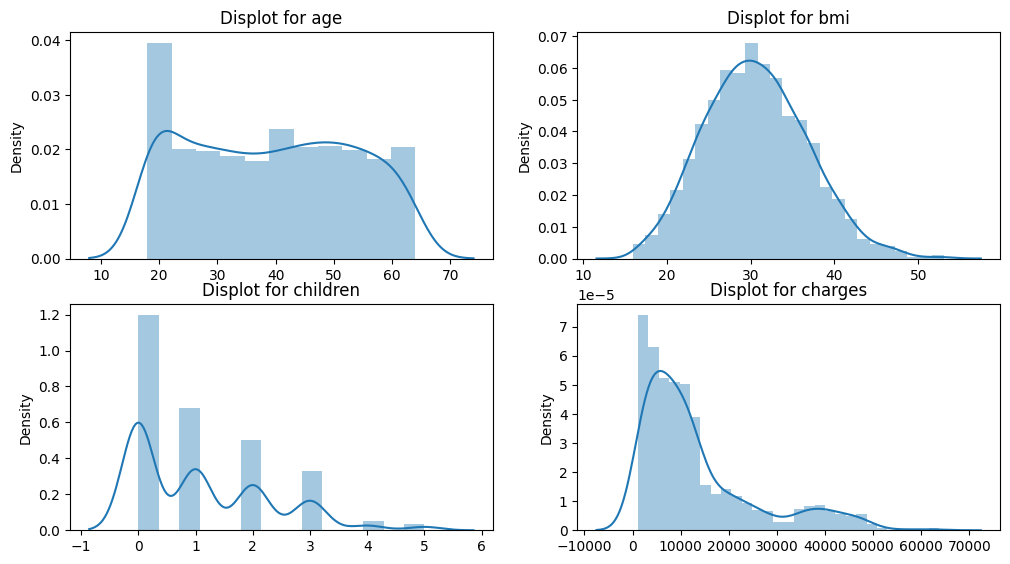

In [47]:
plt.figure(figsize=(12,10))
for i in range(len(num_cols)):
    plt.subplot(3,2,i+1)
    sns.distplot(x=df[num_cols[i]])
    plt.title(f'Displot for {num_cols[i]}')
plt.show()

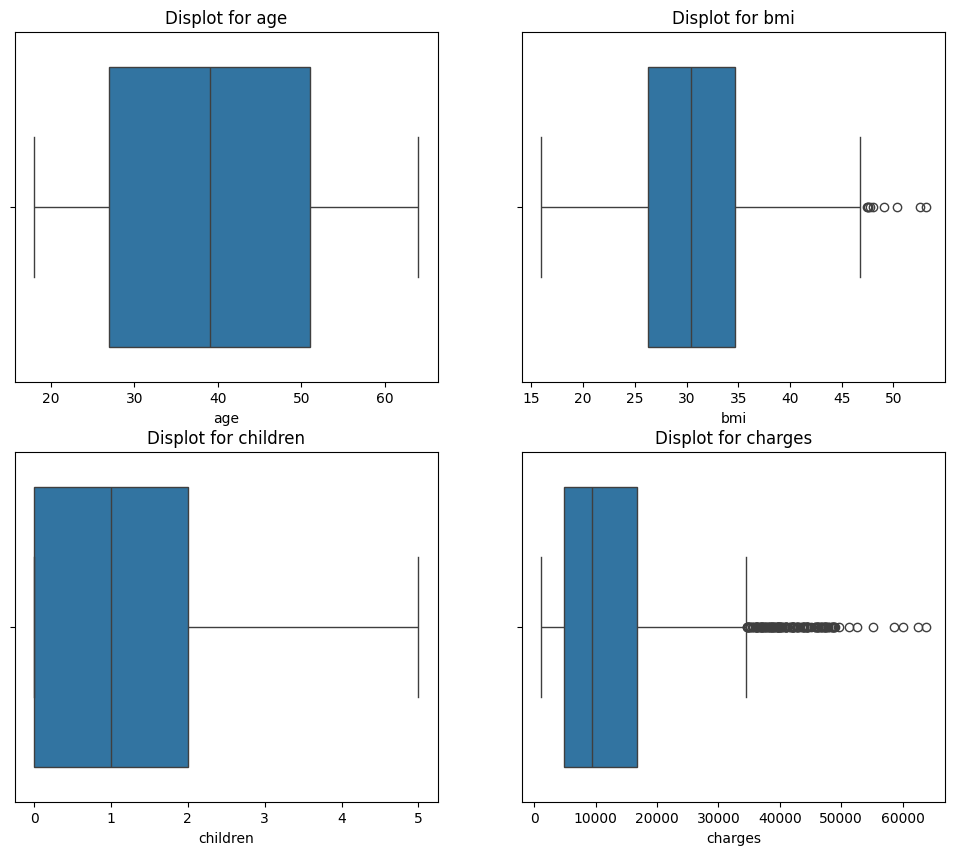

In [48]:
#Detecting outliers
plt.figure(figsize=(12,10))
for i in range(len(num_cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Displot for {num_cols[i]}')
plt.show()

In [49]:
#Outlier Treatment
cols=['bmi','charges']
df[cols].describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
bmi,1337.0,30.663452,6.100468,15.9600,30.4000,41.1080,41.800000,42.455200,43.920800,46.411200,53.13000
charges,1337.0,13279.121487,12110.359656,1121.8739,9386.1613,41210.0498,42920.126232,44495.190584,46677.324238,48537.796878,63770.42801


In [50]:
#Checking records beyond given condition
print(df[df['bmi']>46.411200].shape)
print(df[df['charges']>41210.0498].shape)

(14, 7)
(67, 7)


In [51]:
df['bmi']=np.where(df['bmi']>46.411200,46.411200,df['bmi'])
df['charges']=np.where(df['charges']>41210.0498,41210.0498,df['charges'])

In [52]:
df.shape

(1337, 7)

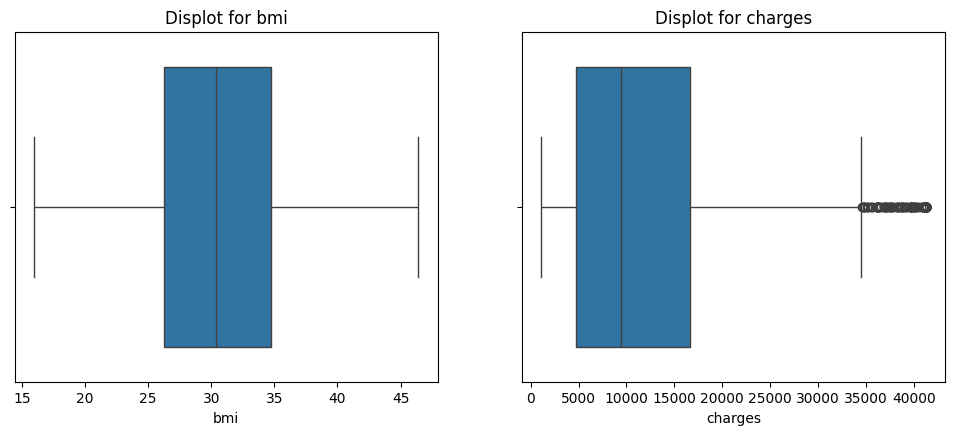

In [53]:
#After outlier treatment

cols=['bmi','charges']
plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Displot for {cols[i]}')
plt.show()

In [54]:
#Encode categorical feature
from sklearn.preprocessing import LabelEncoder

In [55]:
lb=LabelEncoder()
for i in cat_cols:
    df[i]=lb.fit_transform(df[i])

In [56]:
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [57]:
#Selecting x and y
x=df.drop('charges',axis=1)
y=df['charges']
print(x.shape)
print(y.shape)


(1337, 6)
(1337,)


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=80)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(935, 6)
(402, 6)
(935,)
(402,)


In [60]:
#Creating function for evaluation
from sklearn.metrics import *

In [61]:
def eval_model(model,x_train,x_test,y_train,y_test,mname):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    Train_score=model.score(x_train,y_train)
    Test_score=model.score(x_test,y_test)
    Test_mse=mean_squared_error(y_test,ypred)
    Test_rmse=np.sqrt(Test_mse)
    Test_Mae=mean_absolute_error(y_test,ypred)
    res=pd.DataFrame({'Train_Score':Train_score,'Test_Score':Test_score,'Test_Mae':Test_Mae,'Test_Mse':Test_mse,
                      'Test_Rmse':Test_rmse},index=[mname])
    return res

In [62]:
#Import Model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor


In [63]:
#Linear Reg
lr1=LinearRegression()
lr1_res=eval_model(lr1,x_train,x_test,y_train,y_test,'LinReg')
lr1_res


,Train_Score,Test_Score,Test_Mae,Test_Mse,Test_Rmse
LinReg,0.755168,0.754061,3713.730183,3.008791e+07,5485.245197


In [64]:
#DT Reg
dt1=DecisionTreeRegressor(max_depth=8,min_samples_split=10)
dt1_res=eval_model(dt1,x_train,x_test,y_train,y_test,'DTreeREG')
dt1_res

,Train_Score,Test_Score,Test_Mae,Test_Mse,Test_Rmse
DTreeREG,0.916553,0.809411,2544.91753,2.331639e+07,4828.70501


In [65]:
#Radom Forest Regressor
#Rf1 Reg
rf1=RandomForestRegressor(n_estimators=80,max_depth=9,min_samples_split=10)
rf1_res=eval_model(rf1,x_train,x_test,y_train,y_test,'RF')
rf1_res

,Train_Score,Test_Score,Test_Mae,Test_Mse,Test_Rmse
RF,0.920025,0.856555,2303.537513,1.754883e+07,4189.132842


In [66]:
#Saving  the model
import pickle


In [67]:
pickle.dump(lr1,open('lr1_model_14apr.pkl','wb'))
pickle.dump(dt1,open('dt1_model_14apr.pkl','wb'))
pickle.dump(rf1,open('rf1_model_14apr.pkl','wb'))


In [68]:
#Install streamlit
#pip install streamlit